In [2]:
# Basic libraries
import pandas as pd
import numpy as np
from collections import Counter

# For data splitting
from sklearn.model_selection import train_test_split

# For oversampling and undersampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# For plotting (optional)
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load dataset
df = pd.read_csv('creditcard.csv')

# Show class distribution
print("Class distribution:")
print(df['Class'].value_counts())


Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64


In [4]:
X = df.drop('Class', axis=1)   # Features
y = df['Class']                # Target (0: Normal, 1: Fraud)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

print("Before balancing:")
print(Counter(y_train))


Before balancing:
Counter({0: 227451, 1: 394})


In [9]:
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print("After SMOTE:")
print(Counter(y_train_smote))


After SMOTE:
Counter({0: 227451, 1: 227451})


In [6]:
rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

print("After Undersampling:")
print(Counter(y_train_under))


After Undersampling:
Counter({0: 394, 1: 394})


In [7]:
# First undersample majority
X_temp, y_temp = RandomUnderSampler(sampling_strategy=0.1).fit_resample(X_train, y_train)

# Then oversample minority
X_hybrid, y_hybrid = SMOTE().fit_resample(X_temp, y_temp)

print("After Hybrid Sampling:")
print(Counter(y_hybrid))


After Hybrid Sampling:
Counter({0: 3940, 1: 3940})


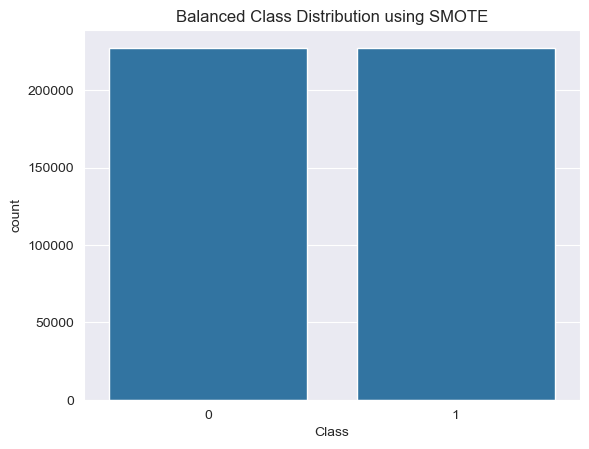

In [10]:
sns.countplot(x=y_train_smote)
plt.title("Balanced Class Distribution using SMOTE")
plt.show()


In [11]:
X_balanced, y_balanced = X_train_smote, y_train_smote


In [25]:
from sklearn.model_selection import train_test_split

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_train_smote, y_train_smote, test_size=0.2, random_state=42, stratify=y_train_smote)


In [19]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

C:\Users\sudhi\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
#model evaluation
#accuracy on training data

In [27]:
print("X_test_final shape:", X_test_final.shape)
print("y_test_final shape:", y_test_final.shape)


X_test_final shape: (90981, 30)
y_test_final shape: (90981,)


In [28]:
from sklearn.model_selection import train_test_split

# Split only after applying SMOTE
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_train_smote, y_train_smote, test_size=0.2, random_state=42, stratify=y_train_smote)


In [35]:
y_pred = model_lr.predict(X_test_final)


In [33]:
print(len(y_pred))         # should be equal to ↓
print(len(y_test_final))   # both should match


90981
90981


In [34]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test_final, y_pred))
print(classification_report(y_test_final, y_pred, target_names=["Legit", "Fraud"]))


[[44959   532]
 [ 1514 43976]]
              precision    recall  f1-score   support

       Legit       0.97      0.99      0.98     45491
       Fraud       0.99      0.97      0.98     45490

    accuracy                           0.98     90981
   macro avg       0.98      0.98      0.98     90981
weighted avg       0.98      0.98      0.98     90981



In [36]:
import joblib

joblib.dump(model_lr, 'fraud_detection_model.pkl')  # Save to disk


['fraud_detection_model.pkl']